In [1]:
import pandas as pd
import json
import seaborn as sns
import numpy as np

# pd.set_option('display.max_rows', 100, 'display.max_columns', None)

In [2]:
data = []

with open('data/yelp_academic_dataset_business.json') as f:

    for line in f:
        
        #Parse the JSON data
        json_dict = json.loads(line)

        if json_dict['attributes']:
            if 'BusinessParking' in json_dict['attributes'].keys():

                json_dict['attributes']['BusinessParking'] = eval(json_dict['attributes']['BusinessParking'])

        data.append(json_dict)

In [3]:
businesses = pd.json_normalize(data, )

In [4]:
# drop row that have no category labels
businesses.dropna(subset='categories', inplace=True)
# reset index
businesses.reset_index(drop=True, inplace=True)

In [5]:
cat_data = pd.read_csv('data/categories.csv', header=None)
categories = cat_data[0].tolist()
restaurants = pd.DataFrame()

restaurants = businesses.loc[businesses['categories'].str.contains('|'.join(categories))]

In [6]:
restaurants.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,attributes.AcceptsInsurance,attributes.BestNights,attributes.BYOB,attributes.Corkage,attributes.BYOBCorkage,attributes.HairSpecializesIn,attributes.Open24Hours,attributes.RestaurantsCounterService,attributes.AgesAllowed,attributes.DietaryRestrictions
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,MO,63123,38.565165,-90.321087,3.0,19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,TN,37207,36.208102,-86.768170,1.5,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
restaurants.isna().sum().sort_values(ascending=True)

business_id                                 0
name                                        0
address                                     0
city                                        0
state                                       0
                                        ...  
attributes.RestaurantsCounterService    66800
attributes.HairSpecializesIn            66813
attributes                              66819
attributes.BusinessParking              66819
hours                                   66819
Length: 65, dtype: int64

In [8]:
#1 dropping less important columns
restaurants.drop(
  [
    'attributes',
    'attributes.HairSpecializesIn',
    'attributes.RestaurantsCounterService',
    'attributes.Open24Hours',
    'attributes.DietaryRestrictions',
    'attributes.AcceptsInsurance',
    'attributes.AgesAllowed',
    'attributes.BYOBCorkage',
    'attributes.Corkage',
    'attributes.Smoking',
    'attributes.BYOB',
    'attributes.GoodForDancing',
    'attributes.CoatCheck',
    'attributes.ByAppointmentOnly',
    'attributes.BestNights',
    'attributes.Music',
    'attributes.DriveThru',
    'attributes.BusinessAcceptsBitcoin',
    'attributes.DogsAllowed',
    'attributes.HappyHour',
    'attributes.WheelchairAccessible',
    'attributes.GoodForMeal',
    'attributes.Ambience',
    'attributes.BusinessParking',
    'address','postal_code','hours','is_open',
  ],
  axis=1, errors='ignore', inplace=True
)

/var/folders/5t/qp4h49ss46q2tzmcdgn4clc40000gn/T/ipykernel_4677/2481614407.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restaurants.drop(


In [9]:
restaurants.rename(
    columns={
        'attributes.BusinessAcceptsCreditCards': 'accepts_credit_cards','hours.Monday':'monday', 'hours.Tuesday':'tuesday','hours.Wednesday':'wednesday',
        'hours.Thursday':'thursday','hours.Friday':'friday','hours.Saturday':'saturday','hours.Sunday':'sunday','attributes.RestaurantsPriceRange2':'price_range',
        'attributes.RestaurantsTakeOut':'take_out','attributes.RestaurantsDelivery':'delivery','attributes.BusinessParking.garage':'parking_garage',
        'attributes.BusinessParking.street':'parking_street','attributes.BusinessParking.validated':'parking_validated','attributes.BusinessParking.lot':'parking_lot',
        'attributes.BusinessParking.valet':'parking_valet','attributes.OutdoorSeating':'outdoor_seating','attributes.RestaurantsReservations':'seats_reservations',
        'attributes.Alcohol':'alcohol','attributes.Ambience':'ambience','attributes.RestaurantsTableService':'table_service','attributes.RestaurantsGoodForGroups':'for_groups',
        'attributes.DriveThru':'drive_thru','attributes.Open24Hours':'open_24_hours','attributes.RestaurantsCounterService':'counter_service','attributes.NoiseLevel': 'noise_level',
        'attributes.GoodForKids' : 'good_for_kids',
        'attributes.RestaurantsAttire': 'attire',
        'attributes.WiFi': 'wifi',
        'attributes.HasTV': 'tv',
        'attributes.Caters': 'caters',
        'attributes.BikeParking': 'bike_parking'
        },
    inplace=True
)

/var/folders/5t/qp4h49ss46q2tzmcdgn4clc40000gn/T/ipykernel_4677/630088975.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restaurants.rename(


In [10]:
restaurants['alcohol'] = restaurants['alcohol'].str.replace("u'", "").str.replace("'", "")
restaurants['noise_level'] = restaurants['noise_level'].str.replace("u'", "").str.replace("'", "")
restaurants['attire'] = restaurants['attire'].str.replace("u'", "").str.replace("'", "")
restaurants['wifi'] = restaurants['wifi'].str.replace("u'", "").str.replace("'", "")

/var/folders/5t/qp4h49ss46q2tzmcdgn4clc40000gn/T/ipykernel_4677/3974078199.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restaurants['alcohol'] = restaurants['alcohol'].str.replace("u'", "").str.replace("'", "")
/var/folders/5t/qp4h49ss46q2tzmcdgn4clc40000gn/T/ipykernel_4677/3974078199.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restaurants['noise_level'] = restaurants['noise_level'].str.replace("u'", "").str.replace("'", "")
/var/folders/5t/qp4h49ss46q2tzmcdgn4clc40000gn/T/ipykernel_4677/3974

In [11]:
restaurants[[
    'parking_garage', 'parking_street', 'parking_validated', 'parking_lot','parking_valet'
]].isna().sum()

parking_garage       11326
parking_street       12699
parking_validated    11543
parking_lot          11676
parking_valet         9431
dtype: int64

In [124]:
def parking_check(row):
    if row['parking_garage'] == True or row['parking_street'] == True or row['parking_validated'] == True or row['parking_lot'] == True or row['parking_valet'] == True:
        return 'True'
    elif row['parking_garage'] == False or row['parking_street'] == False or row['parking_validated'] == False or row['parking_lot'] == False or row['parking_valet'] == False:
        return 'False'

In [109]:
def parking_check(row):
    if any(row[['parking_garage', 'parking_street', 'parking_validated', 'parking_lot','parking_valet']]) == True:
        return True
    # if row[['parking_garage', 'parking_street', 'parking_validated', 'parking_lot','parking_valet']] == False:
    #     return False

In [ ]:
restaurants['parking_available'] = restaurants.apply(parking_check, axis=1)

In [112]:
restaurants.head()

,business_id,name,city,state,latitude,longitude,stars,review_count,categories,accepts_credit_cards,...,outdoor_seating,tv,seats_reservations,sunday,alcohol,good_for_kids,attire,table_service,for_groups,noise_level
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,Philadelphia,PA,39.955505,-75.155564,4.0,80,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",False,...,False,NaN,NaN,7:0-21:0,none,NaN,NaN,NaN,NaN,NaN
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,Green Lane,PA,40.338183,-75.471659,4.5,13,"Brewpubs, Breweries, Food",True,...,NaN,NaN,NaN,12:0-18:0,NaN,True,NaN,NaN,NaN,NaN
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,Ashland City,TN,36.269593,-87.058943,2.0,6,"Burgers, Fast Food, Sandwiches, Food, Ice Crea...",True,...,True,True,False,8:0-22:0,none,True,casual,False,True,NaN
8,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,Affton,MO,38.565165,-90.321087,3.0,19,"Pubs, Restaurants, Italian, Bars, American (Tr...",True,...,True,True,False,NaN,full_bar,True,casual,NaN,True,average
9,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,Nashville,TN,36.208102,-86.768170,1.5,10,"Ice Cream & Frozen Yogurt, Fast Food, Burgers,...",True,...,True,True,False,6:0-21:0,none,True,casual,False,False,NaN


In [12]:
restaurants.columns

Index(['business_id', 'name', 'city', 'state', 'latitude', 'longitude',
       'stars', 'review_count', 'categories', 'accepts_credit_cards', 'monday',
       'tuesday', 'wednesday', 'thursday', 'friday', 'saturday',
       'bike_parking', 'price_range', 'take_out', 'delivery', 'caters', 'wifi',
       'parking_garage', 'parking_street', 'parking_validated', 'parking_lot',
       'parking_valet', 'outdoor_seating', 'tv', 'seats_reservations',
       'sunday', 'alcohol', 'good_for_kids', 'attire', 'table_service',
       'for_groups', 'noise_level'],
      dtype='object')

In [13]:
restaurants.drop(['parking_garage', 'parking_street','parking_validated','parking_lot','parking_valet'], axis=1, inplace=True)

/var/folders/5t/qp4h49ss46q2tzmcdgn4clc40000gn/T/ipykernel_4677/1610618775.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restaurants.drop(['parking_garage', 'parking_street','parking_validated','parking_lot','parking_valet'], axis=1, inplace=True)


In [14]:
restaurants.columns

Index(['business_id', 'name', 'city', 'state', 'latitude', 'longitude',
       'stars', 'review_count', 'categories', 'accepts_credit_cards', 'monday',
       'tuesday', 'wednesday', 'thursday', 'friday', 'saturday',
       'bike_parking', 'price_range', 'take_out', 'delivery', 'caters', 'wifi',
       'outdoor_seating', 'tv', 'seats_reservations', 'sunday', 'alcohol',
       'good_for_kids', 'attire', 'table_service', 'for_groups',
       'noise_level'],
      dtype='object')

### Analyse star ratings

In [69]:
ratings = restaurants.groupby(by='stars').count()

ratings = ratings.reset_index()

ratings = ratings[['stars', 'business_id']]

ratings

,stars,business_id
0,1.0,323
1,1.5,1818
2,2.0,3808
3,2.5,6080
4,3.0,9364
5,3.5,14250
6,4.0,16645
7,4.5,11635
8,5.0,2896


In [70]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

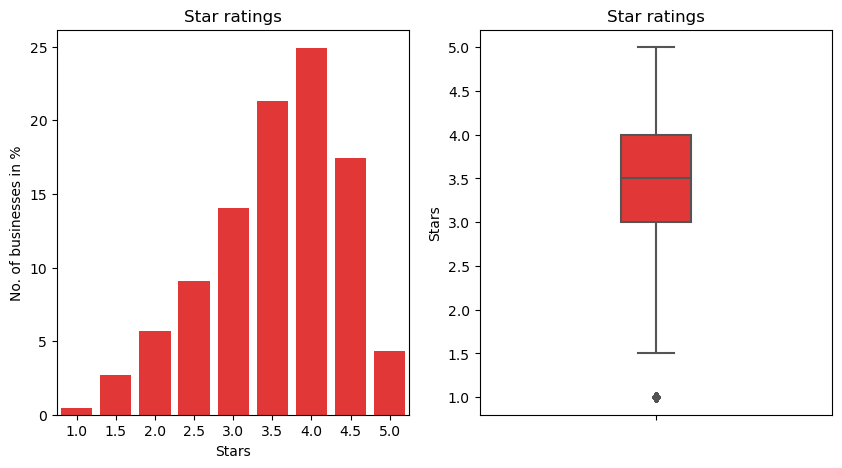

In [71]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# fig.suptitle('Customer ratings', fontsize=16)

sns.barplot(ax = ax[0], x=ratings['stars'], y=ratings['business_id']*100/ratings['business_id'].sum(), color='#FF1A1A')
ax[0].set(xlabel='Stars', ylabel='No. of businesses in %')
ax[0].set_title('Star ratings')

sns.boxplot(ax = ax[1], y=restaurants['stars'], width=0.2, color='#FF1A1A')
ax[1].set(ylabel='Stars')
ax[1].set_title('Star ratings');

In [174]:
businesses['stars'].mean()

3.5976817555559992

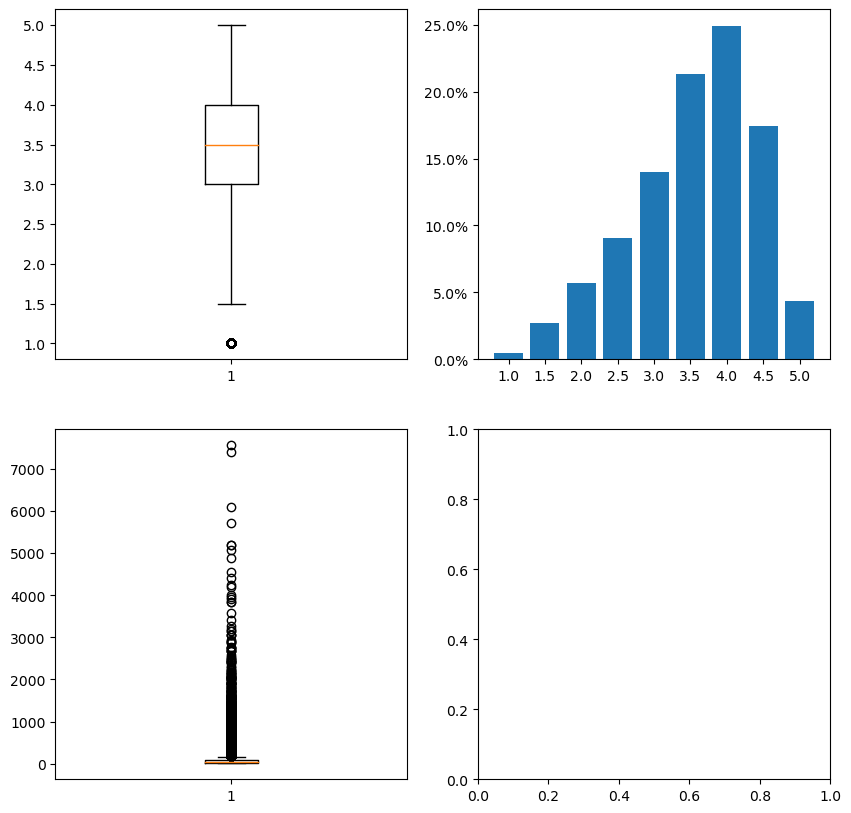

In [72]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

ax[0,0].boxplot(restaurants['stars'])
ax[0,1].bar(ratings['stars'], ratings['business_id']*100/ratings['business_id'].sum(), width=0.4)
ax[0,1].set_xticks([1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])
ax[0,1].yaxis.set_major_formatter(mtick.PercentFormatter())
ax[1,0].boxplot(restaurants['review_count']);

### Star ratings and review counts

In [73]:
restaurants['review_count'].describe()

count    66819.000000
mean        75.501908
std        171.274812
min          5.000000
25%         11.000000
50%         27.000000
75%         74.000000
max       7568.000000
Name: review_count, dtype: float64

In [135]:
# Make yourself visible
# There might be another reason why upgrading to 4 stars is important...
# In case you wonder why the numbers decrease for 5 stars... => refer to article about 5-star-scepticism

restaurants.groupby(by='stars')['review_count'].mean()

stars
1.0     13.340557
1.5     22.276678
2.0     25.321429
2.5     35.983388
3.0     49.547309
3.5     76.714667
4.0    114.639712
4.5     97.812720
5.0     28.168854
Name: review_count, dtype: float64

In [75]:
top_restaurants = restaurants[restaurants['review_count'] > 2000]

In [76]:
top_restaurants[['stars', 'review_count']].describe()

,stars,review_count
count,74.000000,74.000000
mean,4.094595,3075.851351
std,0.376317,1218.832910
min,2.500000,2010.000000
25%,4.000000,2221.000000
50%,4.000000,2682.500000
75%,4.500000,3365.750000
max,4.500000,7568.000000


In [77]:
restaurants[['stars', 'review_count']].corr()

,stars,review_count
stars,1.00000,0.13055
review_count,0.13055,1.00000


In [16]:
len(restaurants.columns)

32

### Look for correlation between star ratings

In [78]:
columns = []
stop_list = [
    'business_id',
    'name',
    'city',
    'state',
    'latitude',
    'longitude',
    'stars',
    'review_count',
    'categories',
    'monday',
    'tuesday',
    'wednesday',
    'thursday',
    'friday',
    'saturday',
    'sunday'
]

for column in restaurants.columns:
    if column not in stop_list:  
        columns.append(column)

columns

['accepts_credit_cards',
 'bike_parking',
 'price_range',
 'take_out',
 'delivery',
 'caters',
 'wifi',
 'outdoor_seating',
 'tv',
 'seats_reservations',
 'alcohol',
 'good_for_kids',
 'attire',
 'table_service',
 'for_groups',
 'noise_level',
 'parking_available']

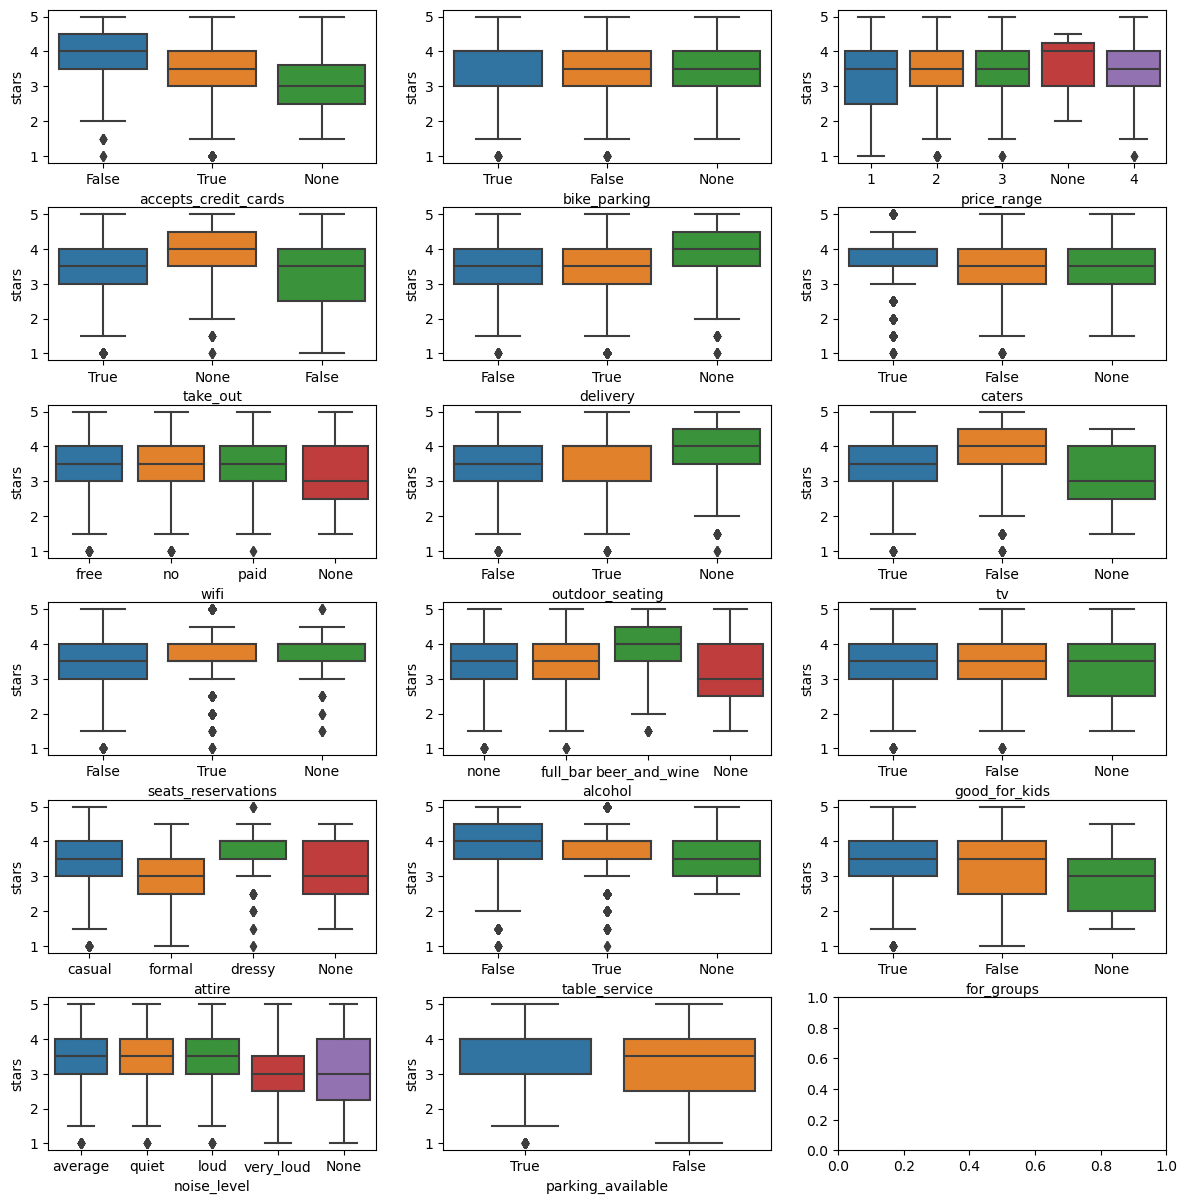

In [79]:
fig, ax = plt.subplots(6, 3, figsize=(12,12))
fig.tight_layout()

counter = 0

for j in range(6):
    for k in range(3):

        if counter == len(columns):
            break

        sns.boxplot(ax=ax[j,k], x=columns[counter], y='stars', data=restaurants)
        counter += 1;

In [80]:
restaurants['attire'].unique()

array([nan, 'casual', 'formal', 'dressy', 'None'], dtype=object)

In [81]:
for column in columns:
    restaurants[column].replace('True', 1, inplace=True)
    restaurants[column].replace('False', 0, inplace=True)
    restaurants[column].replace('nan', np.NaN, inplace=True)
    restaurants[column].replace('None', np.NaN, inplace=True)
    restaurants[column].replace('none', np.NaN, inplace=True)
    restaurants[column].replace('casual', 0, inplace=True)
    restaurants[column].replace('formal', 1, inplace=True)
    restaurants[column].replace('dressy', 2, inplace=True)
    restaurants[column].replace('full_bar', 0, inplace=True)
    restaurants[column].replace('beer_and_wine', 1, inplace=True)
    restaurants[column].replace('average', 0, inplace=True)
    restaurants[column].replace('quiet', 1, inplace=True)
    restaurants[column].replace('loud', 2, inplace=True)
    restaurants[column].replace('very_loud', 3, inplace=True)
    restaurants[column].replace('no', 0, inplace=True)
    restaurants[column].replace('free', 1, inplace=True)
    restaurants[column].replace('paid', 2, inplace=True)

/var/folders/5t/qp4h49ss46q2tzmcdgn4clc40000gn/T/ipykernel_999/3196698684.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restaurants[column].replace('True', 1, inplace=True)
/var/folders/5t/qp4h49ss46q2tzmcdgn4clc40000gn/T/ipykernel_999/3196698684.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restaurants[column].replace('False', 0, inplace=True)
/var/folders/5t/qp4h49ss46q2tzmcdgn4clc40000gn/T/ipykernel_999/3196698684.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

In [82]:
restaurants[[
    'stars',
    'accepts_credit_cards',
    'bike_parking',
    'price_range',
    'take_out',
    'delivery',
    'caters',
    'wifi',
    'outdoor_seating',
    'tv',
    'seats_reservations',
    'alcohol',
    'good_for_kids',
    'attire',
    'table_service',
    'for_groups',
    'noise_level',
    'parking_available'
]].corr(method='spearman')

,stars,accepts_credit_cards,bike_parking,price_range,take_out,delivery,caters,wifi,outdoor_seating,tv,seats_reservations,alcohol,good_for_kids,attire,table_service,for_groups,noise_level,parking_available
stars,1.000000,-0.088760,0.139244,0.099157,0.031279,-0.111429,0.109813,0.038928,0.154198,-0.152792,0.109936,0.195695,-0.026973,0.041133,0.004492,0.030916,-0.084091,0.131823
accepts_credit_cards,-0.088760,1.000000,0.009593,0.095685,0.023001,0.109229,0.083991,0.117551,0.050626,0.020271,0.070835,0.024007,0.021622,0.009502,0.034762,0.081221,-0.017720,0.016830
bike_parking,0.139244,0.009593,1.000000,0.023862,0.025956,-0.002628,0.070018,0.076998,0.226948,-0.028169,0.039737,0.063929,-0.008011,-0.045642,0.007265,0.069934,-0.064144,0.120487
price_range,0.099157,0.095685,0.023862,1.000000,-0.097064,-0.118360,0.050055,0.092587,0.137877,-0.037855,0.478024,-0.226564,-0.229553,0.216771,0.444554,0.163609,-0.062862,0.134872
take_out,0.031279,0.023001,0.025956,-0.097064,1.000000,0.107712,0.180018,0.007599,0.015080,0.054803,-0.063894,0.083570,0.237513,-0.205971,-0.032029,-0.015500,-0.049485,0.007911
delivery,-0.111429,0.109229,-0.002628,-0.118360,0.107712,1.000000,0.190273,0.081934,-0.026993,0.129795,-0.086625,0.137503,0.184374,-0.092758,-0.081027,-0.033866,-0.042541,-0.025846
caters,0.109813,0.083991,0.070018,0.050055,0.180018,0.190273,1.000000,0.092073,0.088283,0.003455,0.101963,0.078000,0.145835,-0.028915,-0.030724,0.041788,-0.050098,0.055303
wifi,0.038928,0.117551,0.076998,0.092587,0.007599,0.081934,0.092073,1.000000,0.218363,0.071740,0.127377,-0.108989,-0.047322,0.023503,0.114593,0.148892,-0.064913,0.074891
outdoor_seating,0.154198,0.050626,0.226948,0.137877,0.015080,-0.026993,0.088283,0.218363,1.000000,-0.004203,0.114318,-0.086238,-0.108780,0.021761,0.044555,0.107528,-0.108623,0.154784
tv,-0.152792,0.020271,-0.028169,-0.037855,0.054803,0.129795,0.003455,0.071740,-0.004203,1.000000,-0.004964,-0.164552,0.025827,-0.039672,0.191540,0.068847,-0.014968,-0.100024


In [84]:
restaurants[[
    'stars',
    'accepts_credit_cards',
    'bike_parking',
    'price_range',
    'take_out',
    'delivery',
    'caters',
    'wifi',
    'outdoor_seating',
    'tv',
    'seats_reservations',
    'alcohol',
    'good_for_kids',
    'attire',
    'table_service',
    'for_groups',
    'noise_level',
    'parking_available'
]].corr(method='pearson')

,stars,accepts_credit_cards,bike_parking,price_range,take_out,delivery,caters,wifi,outdoor_seating,tv,seats_reservations,alcohol,good_for_kids,attire,table_service,for_groups,noise_level,parking_available
stars,1.000000,-0.085609,0.152353,0.118934,0.045280,-0.128253,0.132978,0.030836,0.164647,-0.144906,0.134025,0.185788,-0.027549,0.045451,0.050885,0.053148,-0.131903,0.146277
accepts_credit_cards,-0.085609,1.000000,0.009593,0.089068,0.023001,0.109229,0.083991,0.115742,0.050626,0.020271,0.070835,0.024007,0.021622,0.011403,0.034762,0.081221,-0.019639,0.016830
bike_parking,0.152353,0.009593,1.000000,0.013975,0.025956,-0.002628,0.070018,0.075553,0.226948,-0.028169,0.039737,0.063929,-0.008011,-0.043549,0.007265,0.069934,-0.067203,0.120487
price_range,0.118934,0.089068,0.013975,1.000000,-0.124667,-0.127176,0.040107,0.085700,0.130356,-0.048027,0.479493,-0.221682,-0.266046,0.306512,0.430158,0.149725,-0.040038,0.123722
take_out,0.045280,0.023001,0.025956,-0.124667,1.000000,0.107712,0.180018,0.005230,0.015080,0.054803,-0.063894,0.083570,0.237513,-0.207921,-0.032029,-0.015500,-0.063606,0.007911
delivery,-0.128253,0.109229,-0.002628,-0.127176,0.107712,1.000000,0.190273,0.079395,-0.026993,0.129795,-0.086625,0.137503,0.184374,-0.095144,-0.081027,-0.033866,-0.044811,-0.025846
caters,0.132978,0.083991,0.070018,0.040107,0.180018,0.190273,1.000000,0.090055,0.088283,0.003455,0.101963,0.078000,0.145835,-0.028763,-0.030724,0.041788,-0.074896,0.055303
wifi,0.030836,0.115742,0.075553,0.085700,0.005230,0.079395,0.090055,1.000000,0.214300,0.072408,0.126043,-0.108906,-0.048155,0.024821,0.113384,0.146580,-0.042676,0.071831
outdoor_seating,0.164647,0.050626,0.226948,0.130356,0.015080,-0.026993,0.088283,0.214300,1.000000,-0.004203,0.114318,-0.086238,-0.108780,0.022880,0.044555,0.107528,-0.077104,0.154784
tv,-0.144906,0.020271,-0.028169,-0.048027,0.054803,0.129795,0.003455,0.072408,-0.004203,1.000000,-0.004964,-0.164552,0.025827,-0.040585,0.191540,0.068847,0.013046,-0.100024


In [186]:
t = pd.DataFrame({
    'smoker': [0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1],
    'health': [1,2,1,2,1,2,1,2,1,2,1,2,3,4,4,4,3,4,3,4,3,4]
})


smoker = np.reshape(t['smoker'], (-1, 1))

In [187]:
t.corr(method='pearson')

,smoker,health
smoker,1.000000,0.903696
health,0.903696,1.000000


In [188]:
from sklearn.linear_model import LogisticRegression

X = smoker
y = t['health']

mod = LogisticRegression(random_state=0)

results = mod.fit(X, y)

In [189]:
predict_values = np.reshape(smoker, (-1, 1))

In [190]:
health_pred = results.predict(predict_values)

In [ ]:
health_true = t['health']

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(health_true, health_pred))

In [ ]:
from sklearn.linear_model import LinearRegression

X_linreg = smoker
y_linreg = t['health']

mod_linreg = LinearRegression()

results_linreg = mod_linreg.fit(X_linreg, y_linreg)

In [ ]:
health_pred_linreg = results_linreg.predict(predict_values)
health_pred_linreg

In [ ]:
print(classification_report(health_true, health_pred_linreg))

In [ ]:
import sqlalchemy

In [ ]:
from sql_functions import get_dataframe

In [ ]:
t = get_dataframe('SELECT stars, text, date FROM hh_analytics_23_3.yelp_review_pa')

In [ ]:
column_names = t.columns


with open('data/reviews_pa.csv', 'w') as f:
    header = ','.join(column_names)
    f.write(header + '\n')

    t.to_csv(f, mode='a', header=False, index=False)

In [ ]:
import spacy
import pandas as pd

In [ ]:
t = pd.read_csv('data/reviews_pa.csv')

In [ ]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
reviews = t['text'].to_list()

In [ ]:
for review in reviews:
    doc = nlp(review)

### Calculating average opening hours

In [1]:
import sqlalchemy as sql
from sql_functions import get_dataframe
import pandas as pd

In [13]:
businesses = get_dataframe('SELECT * FROM hh_analytics_23_3.yelp_business_pa')

In [4]:
# Opening and closing time are in the same column. Splits them into two separate columns

week_days = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']

opening_hours = pd.DataFrame()

for day in week_days:
    opening_hours[[f'{day}_open', f'{day}_close']] = businesses[day].str.split('-', expand=True)

In [5]:
opening_hours = opening_hours + ':0'

In [6]:
for column in opening_hours.columns:
    opening_hours[column] = pd.to_timedelta(opening_hours[column])

In [7]:
""" Adds 24 hours to the closing hours if the closing hours is smaller or equal to the opening hours. Otherwise substraction
of the opening hours from the closing hours will be a negative value or zero
"""

for i in range(1, len(opening_hours.columns), 2):  # Loops through the columns close and open for all weekdays

    day_close = opening_hours.columns[i]
    day_open = opening_hours.columns[i-1]

    opening_hours[day_close][opening_hours[day_close] <= opening_hours[day_open]] = opening_hours[day_close] + pd.to_timedelta('24:00:00')

In [8]:
# Substracting opening time from closing time for every day, storing the results in new columns in a new dataframe

avg_openinghours = pd.DataFrame()

for i in range(0, len(opening_hours.columns), 2):
    avg_openinghours[f'{week_days[i//2]}_openinghours'] = opening_hours[opening_hours.columns[i+1]] - opening_hours[opening_hours.columns[i]]

In [9]:
avg_openinghours['avg_openinghours'] = avg_openinghours.sum(axis=1) / avg_openinghours.count(axis=1)

https://spacy.io/universe/project/spacy-pytextrank

https://pypi.org/project/rake-spacy/